In [1]:

import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import qdesc as qd

In [2]:
# Loading our data set RevGrades
df = pd.read_csv("HREmpAttr.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# Generate a frequency distribution on variable Attrition
qd.freqdist(df, 'Attrition')

,Attrition,Count,Percentage
0,No,1233,83.877551
1,Yes,237,16.122449


In [9]:
# Determine the appropriate Measure of Central Tendency and Spread for Monthly Rate when grouped by Attrition
qd.grp_desc(df, "MonthlyRate", "Attrition")

,Attrition,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,1233,14265.78,7102.26,14120.0,6215.0,2094,26997,14.91,0.78
1,Yes,237,14559.31,7208.15,14618.0,6299.0,2326,26999,2.71,0.77


In [10]:
# Determine the appropriate Measure of Central Tendency and Spread for Performance Rating when grouped by Attrition
qd.grp_desc(df, "PerformanceRating", "Attrition")

,Attrition,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,1233,3.15,0.36,3.0,0.0,3,4,363.18,0.78
1,Yes,237,3.16,0.36,3.0,0.0,3,4,69.29,0.77


In [11]:
# Determine the appropriate Measure of Central Tendency and Spread for Relationship Satisfaction when grouped by Attrition
qd.grp_desc(df, "RelationshipSatisfaction", "Attrition")

,Attrition,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,1233,2.73,1.07,3.0,1.0,1,4,64.45,0.78
1,Yes,237,2.60,1.13,3.0,1.0,1,4,12.68,0.77


In [12]:
# Measure of Central Tendency and Spread for Total Working Years when grouped by Attrition
qd.grp_desc(df, "TotalWorkingYears", "Attrition")

,Attrition,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,1233,11.86,7.76,10.0,4.0,0,38,37.39,0.78
1,Yes,237,8.24,7.17,7.0,3.0,0,40,8.50,0.77


In [14]:
# Measure of Central Tendency and Spread for Work Life Balance when grouped by Attrition
qd.grp_desc(df, "WorkLifeBalance", "Attrition")

,Attrition,count,mean,std,median,mad,min,max,AD_stat,crit_5%
0,No,1233,2.78,0.68,3.0,0.0,1,4,130.49,0.78
1,Yes,237,2.66,0.82,3.0,0.0,1,4,18.35,0.77


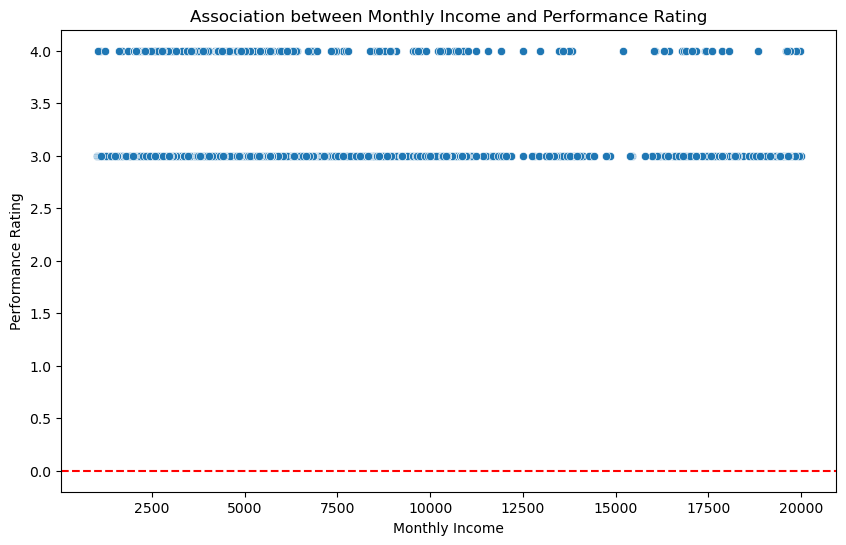

In [18]:
# Explore the association between Monthly Income and Performance Rating using a scatter plot
residuals = df['MonthlyIncome'] - df['PerformanceRating']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MonthlyIncome', y='PerformanceRating')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Association between Monthly Income and Performance Rating')
plt.xlabel('Monthly Income')
plt.ylabel('Performance Rating')
plt.show()

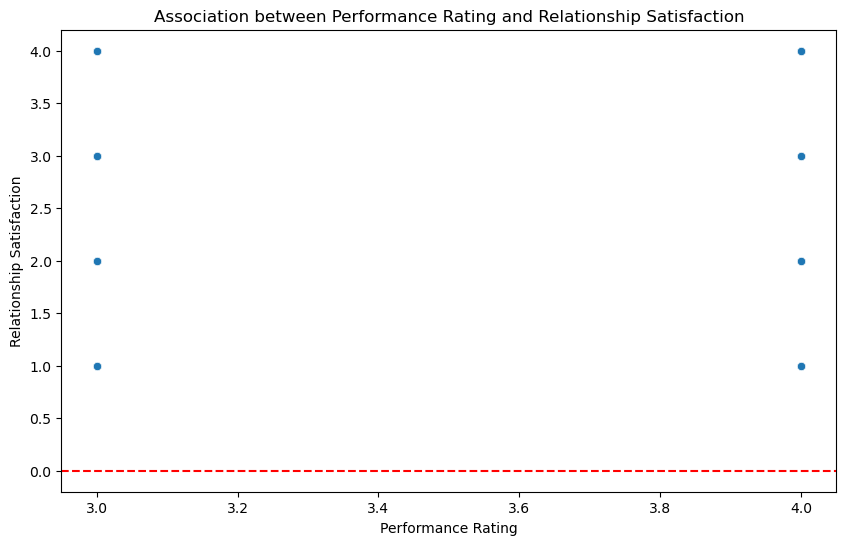

In [19]:
# Explore the association between Performance Rating and Relationship Satisfaction using a scatter plot
residuals = df['PerformanceRating'] - df['RelationshipSatisfaction']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PerformanceRating', y='RelationshipSatisfaction')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Association between Performance Rating and Relationship Satisfaction')
plt.xlabel('Performance Rating')
plt.ylabel('Relationship Satisfaction')
plt.show()

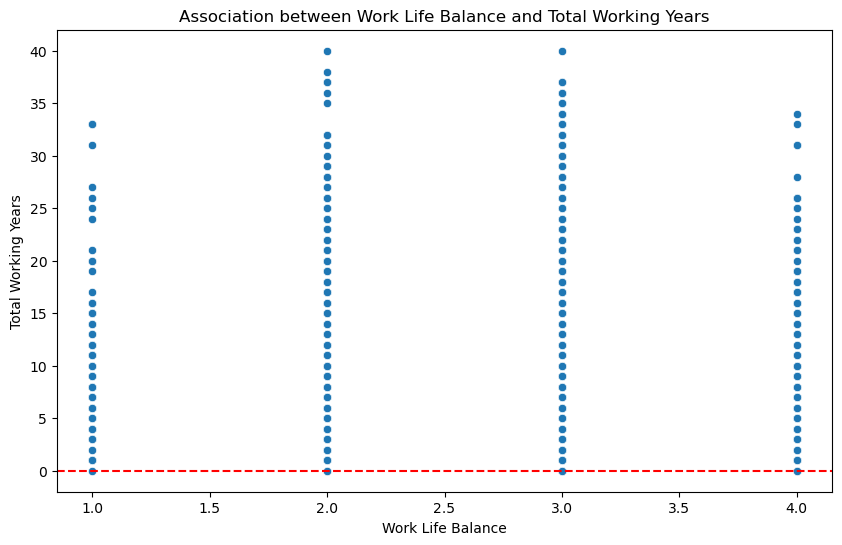

In [20]:
# Explore the association between Work Life Balance and Total Working Years using a scatter plot
residuals = df['WorkLifeBalance'] - df['TotalWorkingYears']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='WorkLifeBalance', y='TotalWorkingYears')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Association between Work Life Balance and Total Working Years')
plt.xlabel('Work Life Balance')
plt.ylabel('Total Working Years')
plt.show()

In [21]:
# Option A: Kendall's tau-b
kendall_corr, kendall_p = stats.kendalltau(df['MonthlyIncome'], df['MonthlyIncome'])
print(f"Kendall's Tau-b correlation coefficient: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")

Kendall's Tau-b correlation coefficient: 1.0000, p-value: 0.0000


In [22]:
# Option A: Kendall's tau-b
kendall_corr, kendall_p = stats.kendalltau(df['PerformanceRating'], df['RelationshipSatisfaction'])
print(f"Kendall's Tau-b correlation coefficient: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")

Kendall's Tau-b correlation coefficient: -0.0302, p-value: 0.2061


In [23]:
# Option A: Kendall's tau-b
kendall_corr, kendall_p = stats.kendalltau(df['WorkLifeBalance'], df['TotalWorkingYears'])
print(f"Kendall's Tau-b correlation coefficient: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")

Kendall's Tau-b correlation coefficient: 0.0023, p-value: 0.9120
